#  Regression Tree

In [1]:
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as met
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import graphviz

#  Importing Data

In [2]:
bikes = np.genfromtxt('bikes.csv',delimiter=',')
count = []
data = []
for i in range(1,len(bikes)):
    data1=[]
    for j in range(1,12):
        if j == 11:
            count.append(bikes[i][j])
        else:
            data1.append(bikes[i][j])
    data.append(data1)
    
features = ['season','year','month','holiday','weekday','workingday','weather','temp','humidity','windspeed']    

#  Building Regression Tree

Here in this section of program, regression is done without stating any parameter. It is in general regression. For consistancy in solution after running several times , I fix the random_state.

In [3]:
tree_mse = DecisionTreeRegressor(criterion='mse',random_state= 10)
tree_mse = tree_mse.fit(data,count)

#  model of regression tree

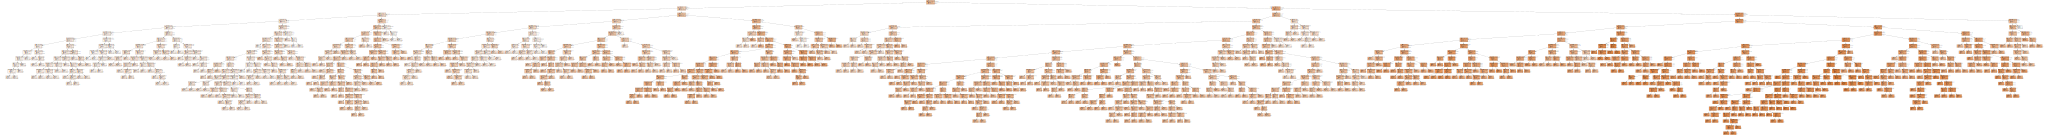

In [4]:
# 
data_graph = tree.export_graphviz(tree_mse,  out_file= None, max_depth=None, feature_names= features, class_names=None, label='all', filled=True, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=True, precision=5) 
graph = graphviz.Source(data_graph)
graph

#  Calculating nodes and mse

In [5]:
# Total no of nodes
print("total no. of nodes: ",tree_mse.tree_.node_count)

# Total no of leaves
leaf = 0
for i in tree_mse.tree_.threshold:
    if i == -2:
        leaf+=1
        
print("Total no of leaf nodes: ",leaf)

# Calculation of mse
count_predict = tree_mse.predict(data)
print("The mse for tree without any tuning of parameters: ", met.mean_squared_error(count, count_predict))


total no. of nodes:  1461
Total no of leaf nodes:  731
The mse for tree without any tuning of parameters:  0.0


#  Finding the parameter to optimize the regressor tree

calculating the performance of tree by varying max.depth and min_sample_leaf parameter

In [6]:
# calculation of no. of nodes and mse varying max.depth parameter
nodes = []
depth = []
mse = []
for i in range(4,21):
    tree_mse = DecisionTreeRegressor(criterion='mse',random_state= 10,max_depth = i)
    tree_mse = tree_mse.fit(data,count)
    count_predict = tree_mse.predict(data)
    nodes.append(tree_mse.tree_.node_count)
    depth.append(i)
    mse.append(met.mean_squared_error(count, count_predict))
print("no. of nodes: ", nodes)
print("\n")
print("mse: ",mse)
print("\n")
print("max_depth: ",depth)
print("\n")
print("\n")

# calculation of no. of nodes and mse varying min_sample_leaf
node1 = []
sample_leaf = []
mse1 = []

for i in range(1,10):
    tree_mse = DecisionTreeRegressor(criterion='mse',random_state= 10,min_samples_leaf= i)
    tree_mse = tree_mse.fit(data,count)
    count_predict = tree_mse.predict(data)
    node1.append(tree_mse.tree_.node_count)
    sample_leaf.append(i)
    mse1.append(met.mean_squared_error(count, count_predict))
print("no. of nodes: ", node1)
print("\n")
print("mse: ",mse1)
print("\n")
print("min_sample_leaf: ",sample_leaf) 

no. of nodes:  [31, 61, 115, 199, 301, 443, 621, 803, 959, 1093, 1203, 1301, 1365, 1411, 1439, 1457, 1459]


mse:  [584702.4259093209, 442781.99854284193, 316691.31915182486, 224581.31866510247, 158482.65294686737, 91970.51372548855, 57148.48074213369, 36132.737296511295, 20114.32817429998, 11797.390516991749, 5268.226883072848, 1934.0689091915835, 454.30984952120383, 109.1076835385317, 13.349179206566347, 1.8577291381668946, 0.36183310533515733]


max_depth:  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]




no. of nodes:  [1461, 633, 411, 293, 235, 193, 161, 143, 131]


mse:  [0.0, 79232.09211126312, 149979.16048791615, 218195.71768940135, 246156.3864818796, 293329.2899428623, 321297.69151562836, 338959.21247626824, 374576.79823038506]


min_sample_leaf:  [1, 2, 3, 4, 5, 6, 7, 8, 9]


Text(0,0.5,'mse')

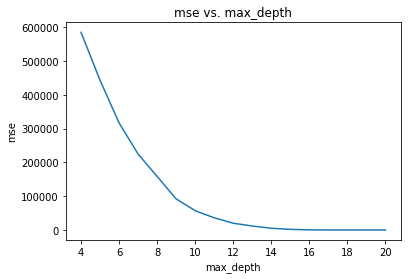

In [7]:
# mse vs. max_depth plot
plt.plot(depth,mse)
plt.title(s="mse vs. max_depth")
plt.xlabel(s='max_depth')
plt.ylabel(s='mse')

Text(0,0.5,'np. of nodes')

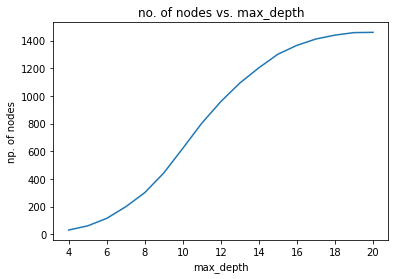

In [8]:
# no. of nodes vs. max_depth plot
plt.plot(depth,nodes)
plt.title(s="no. of nodes vs. max_depth")
plt.xlabel(s='max_depth')
plt.ylabel(s='np. of nodes')

Text(0,0.5,'mse')

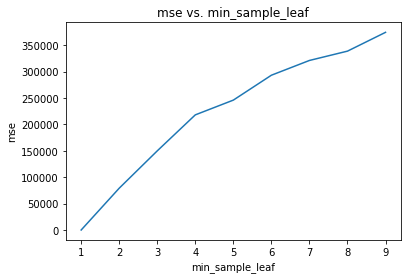

In [9]:
# mse vs. min_sample_leaf
plt.plot(sample_leaf,mse1)
plt.title(s="mse vs. min_sample_leaf")
plt.xlabel(s='min_sample_leaf')
plt.ylabel(s='mse')


#no. of nodes vs. min_sample_leaf
plt.plot(sample_leaf,node1)
plt.title(s="no. of nodes vs.min_sample_leaf")
plt.xlabel(s='min_sample_leaf')
plt.ylabel(s='np. of nodes')

from the above calculations the optimized tree can be build using min_sample _leaf = 2 and max. depth = 9, which gives the approximately same no of nodes and mse value. 

#  optimized  regressor tree 

In [10]:
tree_mse = DecisionTreeRegressor(criterion='mse',random_state= 10,max_depth = 9,min_samples_leaf=2)
tree_mse = tree_mse.fit(data,count)

# Part I :

#  (a) Plot of regressor tree

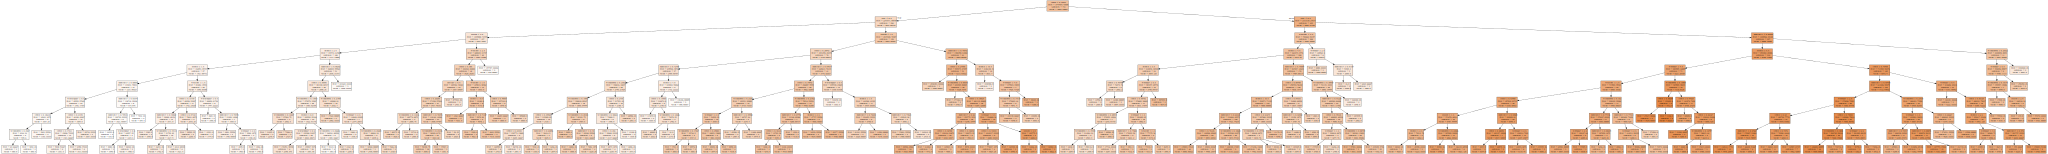

In [11]:
# Plot of model of refressor tree 
data_graph = tree.export_graphviz(tree_mse,  out_file= None, max_depth=None, feature_names= features, class_names=None, label='all', filled=True, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=True, precision=5) 
graph = graphviz.Source(data_graph)
graph

#  (b) Total no of leaf nodes


In [12]:
# Total no of nodes
print("total no. of nodes: ",tree_mse.tree_.node_count)
print(" ")

# Total no of leaf nodes
leaf = 0
for i in tree_mse.tree_.threshold:
    if i == -2:
        leaf+=1
        
print("Total no of leaf nodes: ",leaf)

total no. of nodes:  323
 
Total no of leaf nodes:  162


#  (c) into how no of group of days

In [13]:
feat = tree_mse.tree_.feature
boundary = tree_mse.tree_.threshold

# nodes which characterize the data according to week days
print("Nodes where weekday is decisive parameter:")
for j in range(tree_mse.tree_.node_count):
    if feat[j] == 4:
        print(boundary[j])
        

Nodes where weekday is decisive parameter:
2.5
2.5
2.5
4.5
4.0
5.5
1.5
1.5
2.5
4.5
2.5
2.5
2.5
2.5
5.5
1.5
0.5
4.5
5.5


There are 10 groups into which the days are divided.

# (d) Variables appear in the tree

All avriables appear in the tree. some of the variables have very low importance in compare to others.

# (e) variable importance

In [14]:
# calculating the importance of the variables
for i in range(len(features)):
    print(features[i]," : ",tree_mse.tree_.compute_feature_importances()[i])

season  :  0.07785048726161754
year  :  0.30380457194924454
month  :  0.03332131954020578
holiday  :  0.0006933146634358401
weekday  :  0.017665517950184336
workingday  :  0.003123925353216497
weather  :  0.02226748124428988
temp  :  0.45110071281155356
humidity  :  0.06279075189246518
windspeed  :  0.02738191733378689


According the values of importance corresponding to the variables , temp is the most important variable whereas holiday is the least important variable.

# (f) mse

In [15]:
# calculation of mse
count_predict = tree_mse.predict(data)
print("The mse for the optimized tree is : ", met.mean_squared_error(count, count_predict))


The mse for the optimized tree is :  144016.16236652154


#  Part II :

In this section , there are some changes to the dataset such as 1) january and february have value =1; 2)may to october has value =2; 3)march , april, nov and december has value = 3. these change should be done into the data and the regression tree is calculated.

#  Import data

In [16]:
bikes = np.genfromtxt('bikes.csv',delimiter=',')
count2 = []
data2 = []
for i in range(1,len(bikes)):
    data11=[]
    for j in range(1,12):
        if j == 11:
            count2.append(bikes[i][j])
        else:
            data11.append(bikes[i][j])
    data2.append(data11)
    
features = ['season','year','month','holiday','weekday','workingday','weather','temp','humidity','windspeed']    

#  Modify the data

In [17]:
# modifications in data according to question
for i in range(len(data2)):
    if data2[i][2]==1 or data2[i][2]==2:
        data2[i][2]=1
    elif data2[i][2]==3 or data2[i][2]== 4 or data2[i][2]==11 or data2[i][2]==12:
        data2[i][2]= 2
    else:
        data2[i][2]=3

#  Building Regression Tree

In [18]:
# using the optimized parameters from the above section
tree_mse2 = DecisionTreeRegressor(criterion='mse',random_state= 10,max_depth = 9,min_samples_leaf=2)
tree_mse2 = tree_mse2.fit(data2,count2)

#  calculation parameters to check the performance

In [19]:
# calculation of mse
count_predict2 = tree_mse2.predict(data2)
print("The mse for the new tree is : ", met.mean_squared_error(count2, count_predict2))
print(" ")

# Total no of nodes
print("total no. of nodes: ",tree_mse2.tree_.node_count)
print(" ")

# Total no of leaf nodes
leaf = 0
for i in tree_mse2.tree_.threshold:
    if i == -2:
        leaf+=1
        
print("Total no of leaf nodes: ",leaf)
print(" ")

# calculating the importance of the variables
print("Importance of variable :")
print(" ")
for i in range(len(features)):
    print(features[i]," : ",tree_mse2.tree_.compute_feature_importances()[i])

The mse for the new tree is :  158702.87106075848
 
total no. of nodes:  317
 
Total no of leaf nodes:  159
 
Importance of variable :
 
season  :  0.08481481119156586
year  :  0.3050478011120238
month  :  0.014758814689534794
holiday  :  0.0006961518459148119
weekday  :  0.016863830313110385
workingday  :  0.002966206440285519
weather  :  0.014186194970726575
temp  :  0.45643122593657165
humidity  :  0.07198048872112918
windspeed  :  0.03225447477913758


# model plot

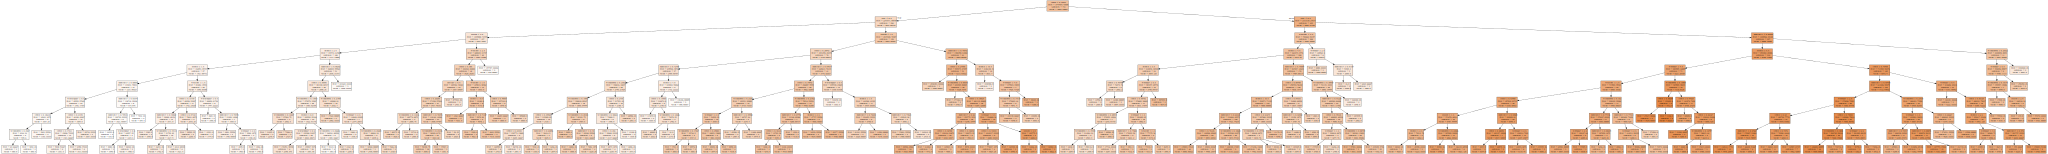

In [20]:
# Plot of model of refressor tree 
data_graph2 = tree.export_graphviz(tree_mse2,  out_file= None, max_depth=None, feature_names= features, class_names=None, label='all', filled=True, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=True, precision=5) 
graph = graphviz.Source(data_graph)
graph

In the data modification as per the question, the mse is slighlty increased but the no of nodes and no of leaf nodes are decreased. also the importance of temp increases very slightly but the most important and least important variables are same as before i.e. temp and holidays, respectively. overall there is not much change in the performance of the regressor tree after the given data modification.